<a href="https://colab.research.google.com/github/WilliamPoe/CSCI-290/blob/main/notebooks/Gaussian_Mixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Datasets

In [2]:
df_penguin = pd.read_csv('https://github.com/WilliamPoe/CSCI-290/raw/refs/heads/main/Data/penguins.csv') # Penguins dataset
df_iris = pd.read_csv('https://github.com/WilliamPoe/CSCI-290/raw/refs/heads/main/Data/Iris.csv') # Iris dataset

df_penguin = numeric_df = df_penguin.dropna()


In [3]:
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
gm = GaussianMixture(n_components=3)
gm.fit(df_iris[['SepalLengthCm', 'PetalWidthCm']])

gm_1 = GaussianMixture(n_components=3)
gm_1.fit(df_penguin[['bill_depth_mm', 'flipper_length_mm']])

GaussianMixture(n_components=3)

In [5]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    X_np = X.values
    plt.plot(X_np[:, 0], X_np[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Iris Dataset

In [6]:
print('Weights:\n',gm.weights_)
print('Means:\n', gm.means_)
print('Covariances:\n', gm.covariances_)
print('Converged:\n', gm.converged_)
print('Iterations:\n', gm.n_iter_)

Weights:
 [0.32709684 0.30858553 0.36431763]
Means:
 [[5.00605757 0.23727675]
 [6.57289666 2.05192938]
 [5.977111   1.33910201]]
Covariances:
 [[[0.12407758 0.01055895]
  [0.01055895 0.00905628]]

 [[0.4171415  0.05278455]
  [0.05278455 0.06790735]]

 [[0.30671183 0.08640131]
  [0.08640131 0.05609398]]]
Converged:
 True
Iterations:
 13


In [7]:
gm.predict_proba(df_iris[['SepalLengthCm', 'PetalWidthCm']]).round(3)

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.978, 0.   , 0.022],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.

In [8]:
X_new, y_new = gm.sample(6)
X_new

array([[4.6958745 , 0.27849348],
       [5.05427494, 0.18656255],
       [7.1248072 , 2.07208764],
       [6.83255097, 2.22201229],
       [6.90460018, 2.14380424],
       [6.25011534, 1.61644271]])

In [9]:
y_new

array([0, 0, 1, 1, 1, 2])

In [10]:
gm.score_samples(df_iris[['SepalLengthCm', 'PetalWidthCm']]).round(2)

array([ 0.33,  0.4 ,  0.11, -0.17,  0.41, -1.16, -0.75,  0.41, -1.  ,
       -0.56, -0.44,  0.3 , -0.56, -1.88, -2.72, -2.11, -1.16,  0.27,
       -1.45,  0.27, -0.44, -1.01, -0.17, -3.5 ,  0.3 ,  0.41, -1.14,
        0.16,  0.16,  0.11,  0.3 , -1.16, -1.11, -0.88, -0.56,  0.41,
       -0.88, -0.56, -1.  ,  0.33,  0.25, -1.23, -1.  , -5.36, -1.01,
       -0.07,  0.33, -0.17, -0.09,  0.41, -2.97, -0.78, -1.96, -1.04,
       -0.91, -0.67, -0.96, -2.44, -1.87, -2.67, -2.15, -0.98, -2.41,
       -0.54, -0.83, -1.66, -1.75, -1.9 , -0.7 , -1.04, -1.85, -0.63,
       -0.71, -1.03, -1.2 , -1.34, -2.04, -1.31, -0.83, -1.73, -1.07,
       -1.56, -0.71, -1.29, -2.51, -1.29, -1.33, -0.96, -0.83, -1.04,
       -0.9 , -0.54, -0.71, -2.15, -0.83, -0.71, -0.67, -0.77, -1.79,
       -0.67, -3.17, -1.91, -1.5 , -1.39, -1.39, -2.48, -4.69, -2.39,
       -1.36, -2.76, -1.18, -1.28, -1.24, -2.12, -3.52, -1.81, -1.31,
       -2.7 , -2.79, -0.83, -1.66, -2.36, -2.96, -1.39, -1.2 , -2.12,
       -1.47, -1.58,

In [11]:
densities = gm.score_samples(df_iris[['SepalLengthCm', 'PetalWidthCm']])
density_threshold = np.percentile(densities, 2)
anomalies = df_iris[densities < density_threshold]

<ipython-input-5-9de137799c41>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-5-9de137799c41>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
<ipython-input-5-9de137799c41>:19: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
<ipython-input-5-9de137799c41>:22: UserWarning: Log scale:

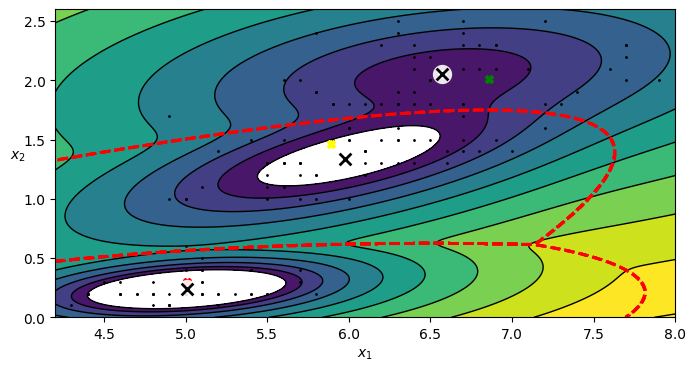

In [12]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, df_iris[['SepalLengthCm', 'PetalWidthCm']])
# Calulated center from kmeans model
k_means_centroids = [5.005556, 0.301852], [6.857143, 2.011905], [5.892593, 1.462963]
colors = ['red', 'green', 'yellow']
for i in range(len(k_means_centroids)):
    plt.plot(k_means_centroids[i][0], k_means_centroids[i][1], 'X', color=colors[i])
plt.plot()
plt.show()

In [13]:
gm.bic(df_iris[['SepalLengthCm', 'PetalWidthCm']])

468.7344469385945

In [14]:
gm.aic(df_iris[['SepalLengthCm', 'PetalWidthCm']])

417.55364693895814

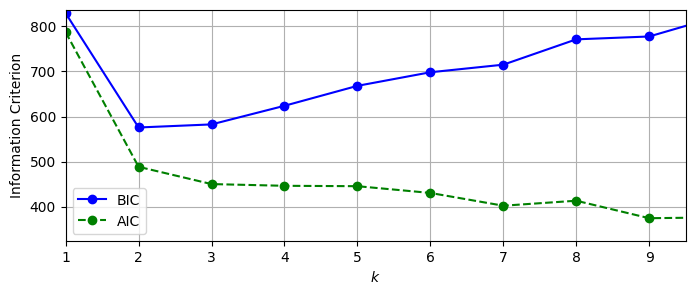

In [15]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
             for k in range(1, 11)]
bics = [model.bic(df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) for model in gms_per_k]
aics = [model.aic(df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

Iris Accuracy

In [16]:
iris_pred = gm.predict(df_iris[['SepalLengthCm', 'PetalWidthCm']])

In [52]:
true_labels = df_iris['Species'].apply(lambda x: {'Iris-setosa': 0, 'Iris-versicolor': 2, 'Iris-virginica': 1}[x]).values

In [53]:
accuracy = accuracy_score(true_labels, iris_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.96


In [54]:
iris_cm = confusion_matrix(true_labels, iris_pred)

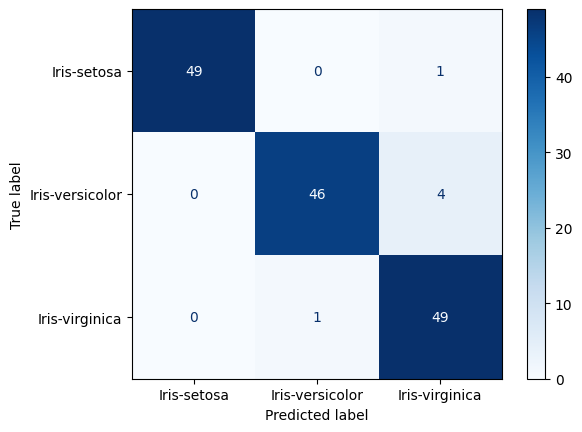

In [55]:
iris_disp = ConfusionMatrixDisplay(confusion_matrix=iris_cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
iris_disp.plot(cmap='Blues')
plt.show()

# Penguins Dataset

In [21]:
print('Weights:\n',gm_1.weights_)
print('Means:\n', gm_1.means_)
print('Covariances:\n', gm_1.covariances_)
print('Converged:\n', gm_1.converged_)
print('Iterations:\n', gm_1.n_iter_)

Weights:
 [0.31681534 0.35725344 0.32593123]
Means:
 [[ 19.0123442  196.24575248]
 [ 14.99636189 217.23735971]
 [ 17.74595479 187.72214665]]
Covariances:
 [[[ 1.21940199  1.02776019]
  [ 1.02776019 36.91934156]]

 [[ 0.96391048  4.57806068]
  [ 4.57806068 42.99571529]]

 [[ 0.81061443  0.04952097]
  [ 0.04952097 30.62695057]]]
Converged:
 True
Iterations:
 8


In [22]:
gm_1.predict_proba(df_penguin[['bill_depth_mm', 'flipper_length_mm']]).round(3)

array([[0.104, 0.   , 0.896],
       [0.087, 0.   , 0.913],
       [0.541, 0.   , 0.459],
       [0.804, 0.   , 0.196],
       [0.95 , 0.   , 0.05 ],
       [0.048, 0.   , 0.952],
       [0.921, 0.   , 0.079],
       [0.05 , 0.   , 0.95 ],
       [0.989, 0.   , 0.011],
       [0.998, 0.   , 0.002],
       [0.096, 0.   , 0.904],
       [0.815, 0.   , 0.185],
       [0.995, 0.   , 0.005],
       [0.132, 0.   , 0.868],
       [0.998, 0.   , 0.002],
       [0.023, 0.   , 0.977],
       [0.087, 0.   , 0.913],
       [0.559, 0.   , 0.441],
       [0.122, 0.   , 0.878],
       [0.029, 0.   , 0.971],
       [0.343, 0.   , 0.657],
       [0.134, 0.   , 0.866],
       [0.147, 0.   , 0.853],
       [0.022, 0.   , 0.978],
       [0.107, 0.   , 0.893],
       [0.018, 0.   , 0.982],
       [0.037, 0.   , 0.963],
       [0.163, 0.   , 0.837],
       [0.212, 0.   , 0.788],
       [0.319, 0.   , 0.681],
       [0.997, 0.   , 0.003],
       [0.858, 0.   , 0.142],
       [0.072, 0.   , 0.928],
       [0.

In [23]:
X_new_1, y_new_1 = gm_1.sample(6)
X_new_1

array([[ 20.5220962 , 187.0457783 ],
       [ 18.02167204, 196.45017275],
       [ 14.66553688, 221.33273342],
       [ 16.37516872, 218.4329103 ],
       [ 17.18385943, 184.37100636],
       [ 18.17058677, 186.70571236]])

In [24]:
y_new_1

array([0, 0, 1, 1, 2, 2])

In [25]:
gm_1.score_samples(df_penguin[['bill_depth_mm', 'flipper_length_mm']]).round(2)

array([-5.77, -4.6 , -4.69, -4.86, -6.66, -5.26, -4.98, -5.06, -7.53,
       -6.66, -4.59, -4.7 , -6.05, -4.92, -7.68, -7.82, -6.02, -5.07,
       -4.64, -5.68, -4.98, -5.24, -4.43, -9.06, -6.26, -6.74, -6.15,
       -4.39, -5.38, -5.4 , -6.72, -5.82, -5.83, -6.6 , -5.63, -5.07,
       -4.62, -4.74, -5.03, -5.07, -4.68, -5.9 , -4.38, -7.53, -4.5 ,
       -4.88, -4.38, -5.11, -4.46, -4.54, -4.55, -4.61, -6.07, -4.73,
       -5.07, -6.79, -4.96, -4.45, -4.99, -4.45, -6.67, -5.07, -5.34,
       -4.92, -4.82, -4.46, -5.35, -4.75, -4.48, -4.62, -5.14, -6.07,
       -6.18, -4.73, -4.64, -5.01, -4.88, -4.93, -4.43, -5.68, -5.26,
       -4.59, -5.07, -4.68, -5.78, -6.43, -4.88, -4.54, -4.59, -6.83,
       -4.56, -4.68, -7.73, -4.5 , -4.46, -5.76, -6.76, -5.82, -4.55,
       -5.38, -5.95, -5.82, -5.6 , -4.76, -6.76, -6.05, -4.59, -4.92,
       -6.63, -4.71, -4.81, -5.81, -4.81, -4.59, -4.66, -5.13, -7.12,
       -5.45, -6.66, -4.91, -4.48, -4.63, -4.81, -8.25, -4.38, -4.81,
       -4.53, -4.98,

In [26]:
densities_1 = gm_1.score_samples(df_penguin[['bill_depth_mm', 'flipper_length_mm']])
density_threshold_1 = np.percentile(densities_1, 2)
anomalies_1 = df_penguin[densities_1 < density_threshold_1]

<ipython-input-5-9de137799c41>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-5-9de137799c41>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(

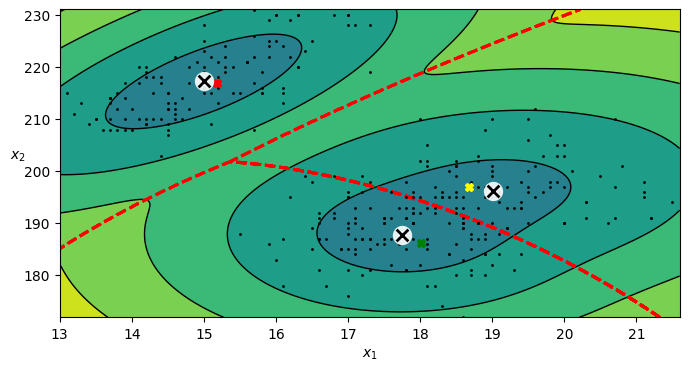

In [27]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm_1, df_penguin[['bill_depth_mm', 'flipper_length_mm']])
# Calculated centers for kmeans model
k_means_centroids = [15.188281, 216.960938], [18.008036, 186.1875], [18.673529, 196.95098]
colors = ['red', 'green', 'yellow']
for i in range(len(k_means_centroids)):
    plt.plot(k_means_centroids[i][0], k_means_centroids[i][1], 'X', color=colors[i])
plt.plot()
plt.show()

In [28]:
gm_1.bic(df_penguin[['bill_depth_mm', 'flipper_length_mm']])

3660.1018324475976

In [29]:
gm_1.aic(df_penguin[['bill_depth_mm', 'flipper_length_mm']])

3595.36341011793

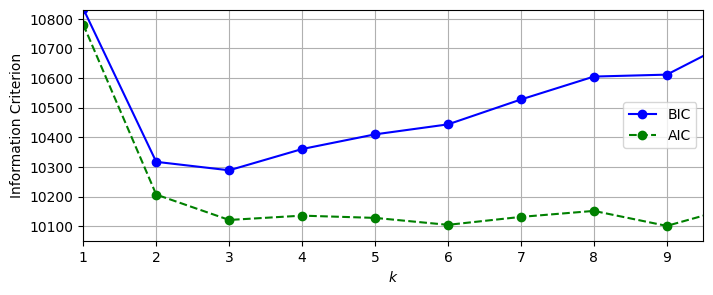

In [30]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(df_penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
             for k in range(1, 11)]
bics = [model.bic(df_penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]) for model in gms_per_k]
aics = [model.aic(df_penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

Penguin Accuracy

In [31]:
penguins_pred = gm_1.predict(df_penguin[['bill_depth_mm', 'flipper_length_mm']])

In [40]:
true_labels = df_penguin['species'].apply(lambda x: {'Adelie': 2, 'Chinstrap': 0, 'Gentoo': 1}[x]).values

In [41]:
accuracy = accuracy_score(true_labels, penguins_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7597597597597597


In [42]:
penguin_cm = confusion_matrix(true_labels, penguins_pred)

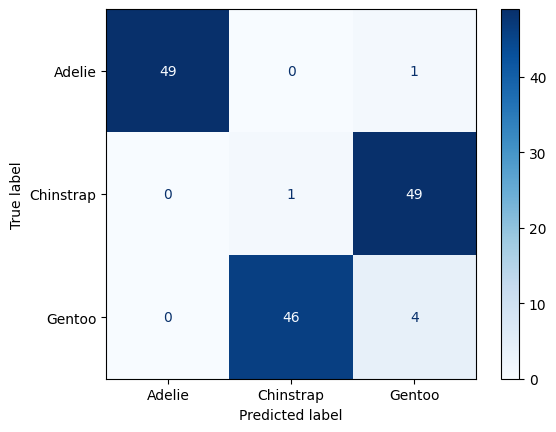

In [43]:
penguin_disp = ConfusionMatrixDisplay(confusion_matrix=iris_cm, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
penguin_disp.plot(cmap='Blues')
plt.show()